Balance of classes:
quality
0    0.86429
1    0.13571
Name: proportion, dtype: float64
--- kNN ---
Accuracy: 0.8906
Precision: 0.6538
Recall: 0.3953
F1-score: 0.4928
ROC AUC: 0.8229
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       277
           1       0.65      0.40      0.49        43

    accuracy                           0.89       320
   macro avg       0.78      0.68      0.72       320
weighted avg       0.88      0.89      0.88       320

[[268   9]
 [ 26  17]]
--- Decision Tree ---
Accuracy: 0.9062
Precision: 0.6327
Recall: 0.7209
F1-score: 0.6739
ROC AUC: 0.8280
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       277
           1       0.63      0.72      0.67        43

    accuracy                           0.91       320
   macro avg       0.79      0.83      0.81       320
weighted avg       0.91      0.91      0.91       320

[[259  18]
 [ 12  31]]


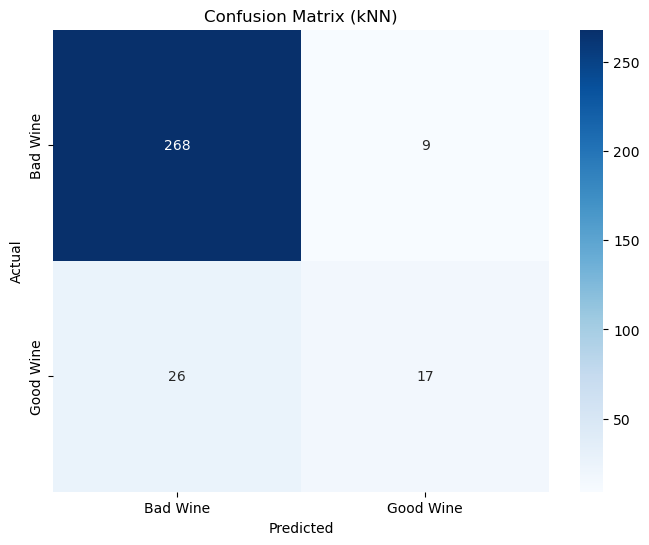

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
wine = pd.read_csv('winequality-red.csv')

# Бинаризация целевой переменной (quality >= 7 - хорошее вино)
wine['quality'] = (wine['quality'] >= 7).astype(int)

# Анализ баланса классов
print("Balance of classes:")
print(wine['quality'].value_counts(normalize=True))

# Разделение на признаки и целевую переменную
X = wine.drop('quality', axis=1)
y = wine['quality']

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки (со стратификацией)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Обучение моделей
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Предсказания
knn_pred = knn.predict(X_test)
dt_pred = dt.predict(X_test)

# Вероятности (для ROC AUC)
knn_prob = knn.predict_proba(X_test)[:, 1]
dt_prob = dt.predict_proba(X_test)[:, 1]

# Метрики
def evaluate_model(model_name, y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=1)
    recall = recall_score(y_true, y_pred, zero_division=1)
    f1 = f1_score(y_true, y_pred, zero_division=1)
    roc_auc = roc_auc_score(y_true, y_prob)
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    

evaluate_model("kNN", y_test, knn_pred, knn_prob)
evaluate_model("Decision Tree", y_test, dt_pred, dt_prob)


# Визуализация Confusion Matrix (пример для kNN)
cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Bad Wine', 'Good Wine'], yticklabels=['Bad Wine', 'Good Wine'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (kNN)')
plt.show()

